#**Description:**
The main goal of this project is to create a reliable model that can accurately spot fraudulent credit card transactions. By looking at past transaction data, we want to find patterns and unusual activities linked to fraud. With this information, we can build a predictive model that flags suspicious transactions as they happen.

Dataset url:


#Name of the colomns


1.   Time - the time of the transaction
2.   V1-V28 - sensitive user details
3.   Amount - the amount of
4.   Class

# Step 1 : Importing libraries like Numpy, Pandas, Matplotlib

In [4]:
#Importing the modules required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step3 : Load the Dataset

In [6]:
#Establishing connection between Data file and Program
path="/content/drive/MyDrive/Colab Notebooks/creditfraud.csv"
df= pd.read_csv(path)

Step 3 : Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

3.1) Understanding Your Variables                                          
 3.1.1) Head of the dataset                               
 3.1.2) Missing Values Analysis                                      
 3.1.3) Class-based Segmentation                      
 3.1.4)The shape of the dataset                                       
 3.1.5)  List types of all columns<br>
 3.1.6) Info of the dataset   
 3.1.7) Summary of the dataset<br>                         

3.2) Data Cleaning                                     
 3.2.1)  Subset Dimension Analysis                               
 3.2.2)   Exploratory Data Analysis (EDA) - Histogram    Visualization                                        
3.2.3) creating a new dataset(concatenating)   
3.2.4) Robustscalling the data

3.3) Data visualisation  
 3.3.1) Distribution of Fraudulent vs Non-Fraudulent Transactions  
 3.3.2) Correlation Heatmap  
 3.3.3)Time vs. Amount Scatter Plot   
 3.3.4)Pairplot for a Subset of Features   
 3.3.5)Time vs. Amount Scatter Plot  
 3.3.6) Distribution of Transaction Amounts

## 3.1.1) Head of the Dataset           
 This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [7]:
#Display the first 5 records from the dataset.
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#Display the trailing 5 records from the dataset.

df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
#To get the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##3.1.2) Missing Values Analysis

In [10]:
#Requesting  the number of missing values in each column of the dataset
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
#Generate and display a random number of records from the dataset.

df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155175,104702.0,1.963470,-0.834009,-2.724616,-1.433803,2.188507,3.289272,-0.619096,0.654798,2.463064,...,0.007597,0.359583,-0.010076,0.760117,0.181437,0.868737,-0.098862,-0.079030,68.49,0
63744,50852.0,0.390477,-1.652766,0.046679,0.738470,-1.325294,-0.522594,0.282068,-0.202284,-1.376932,...,-0.194857,-1.185703,-0.261047,0.475507,0.117188,-0.640523,-0.046759,0.104036,469.49,0
93692,64545.0,-2.167153,-0.345002,1.159493,-1.331275,-0.045221,-1.593281,-0.242222,0.218638,-1.395867,...,-0.192523,-0.415589,0.647695,0.267299,0.459744,-0.537430,-0.105267,-0.137005,10.00,0
90076,62859.0,0.918101,-1.481952,-1.529821,-2.917876,1.205419,3.006882,-0.558221,0.727179,2.042011,...,0.091600,-0.104305,-0.367094,1.056904,0.808969,-0.744378,0.042270,0.058452,235.00,0
108901,71125.0,-0.907519,0.409761,1.556482,-0.499341,-1.330859,0.413839,0.180596,0.340411,0.321492,...,0.140879,0.546268,-0.104061,0.087135,-0.235798,1.029825,-0.477557,-0.338730,137.50,0
166701,118258.0,1.883183,-0.219494,-1.908631,0.390409,0.265243,-0.753337,0.164827,-0.193498,1.044445,...,-0.216737,-0.594121,0.125021,0.459301,-0.054593,-0.120507,-0.028860,-0.001978,93.82,0
60690,49449.0,1.152346,0.208545,0.544465,1.470600,-0.338125,-0.385624,0.043836,-0.015593,0.324718,...,-0.087888,-0.022072,-0.012814,0.397977,0.609007,-0.330601,0.039090,0.017444,2.68,0
241527,151064.0,1.960278,-1.464987,-0.245651,-0.489624,-0.943432,1.350831,-1.552210,0.385749,0.569101,...,-0.402456,-0.502753,0.190052,-0.321535,-0.477964,0.534855,0.015857,-0.034964,77.90,0
229694,146018.0,2.336555,-1.358562,-2.850043,-2.721583,1.567788,3.017046,-1.180868,0.633051,-1.905790,...,-0.315939,-0.598934,0.339473,0.657115,-0.137304,-0.291809,-0.002024,-0.064494,10.00,0
221988,142777.0,0.048918,0.792270,0.134377,-0.888295,0.315515,-0.491192,0.186379,-1.748920,-0.215325,...,1.316329,-1.115179,0.079898,0.014106,0.383341,0.119808,0.165233,0.251293,4.49,0


In [12]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


##3.1.3) Class-based Segmentation

In [13]:

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

## 3.1.4)   The shape of the dataset

This shape () function gives us the number of rows and columns of the dataset

In [14]:
# Number of rows and columns
df.shape


(284807, 31)

No of rows= 284789

No of columns= 31

## 3.1.5 )List types of all columns

Using df.dtypes, we get the list of types of all the columns in our dataset.

In [15]:
# Following are the data types of all columns
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


## 3.1.6) Info of the dataset

info() is used to check the Information about the data and the datatypes of each respective attribute.

In [16]:
# Checking if the dataset has any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3.1.7) Summary of the dataset

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [17]:
# Summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#3.2) CLEANING THE DATA

##3.2.1)  Subset Dimension Analysis

In [18]:
 #counting the number of row and columns
 print(legit.shape)
 print(fraud.shape)

(284315, 31)
(492, 31)


 ## 3.2.2) Exploratory Data Analysis (EDA) - Histogram

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

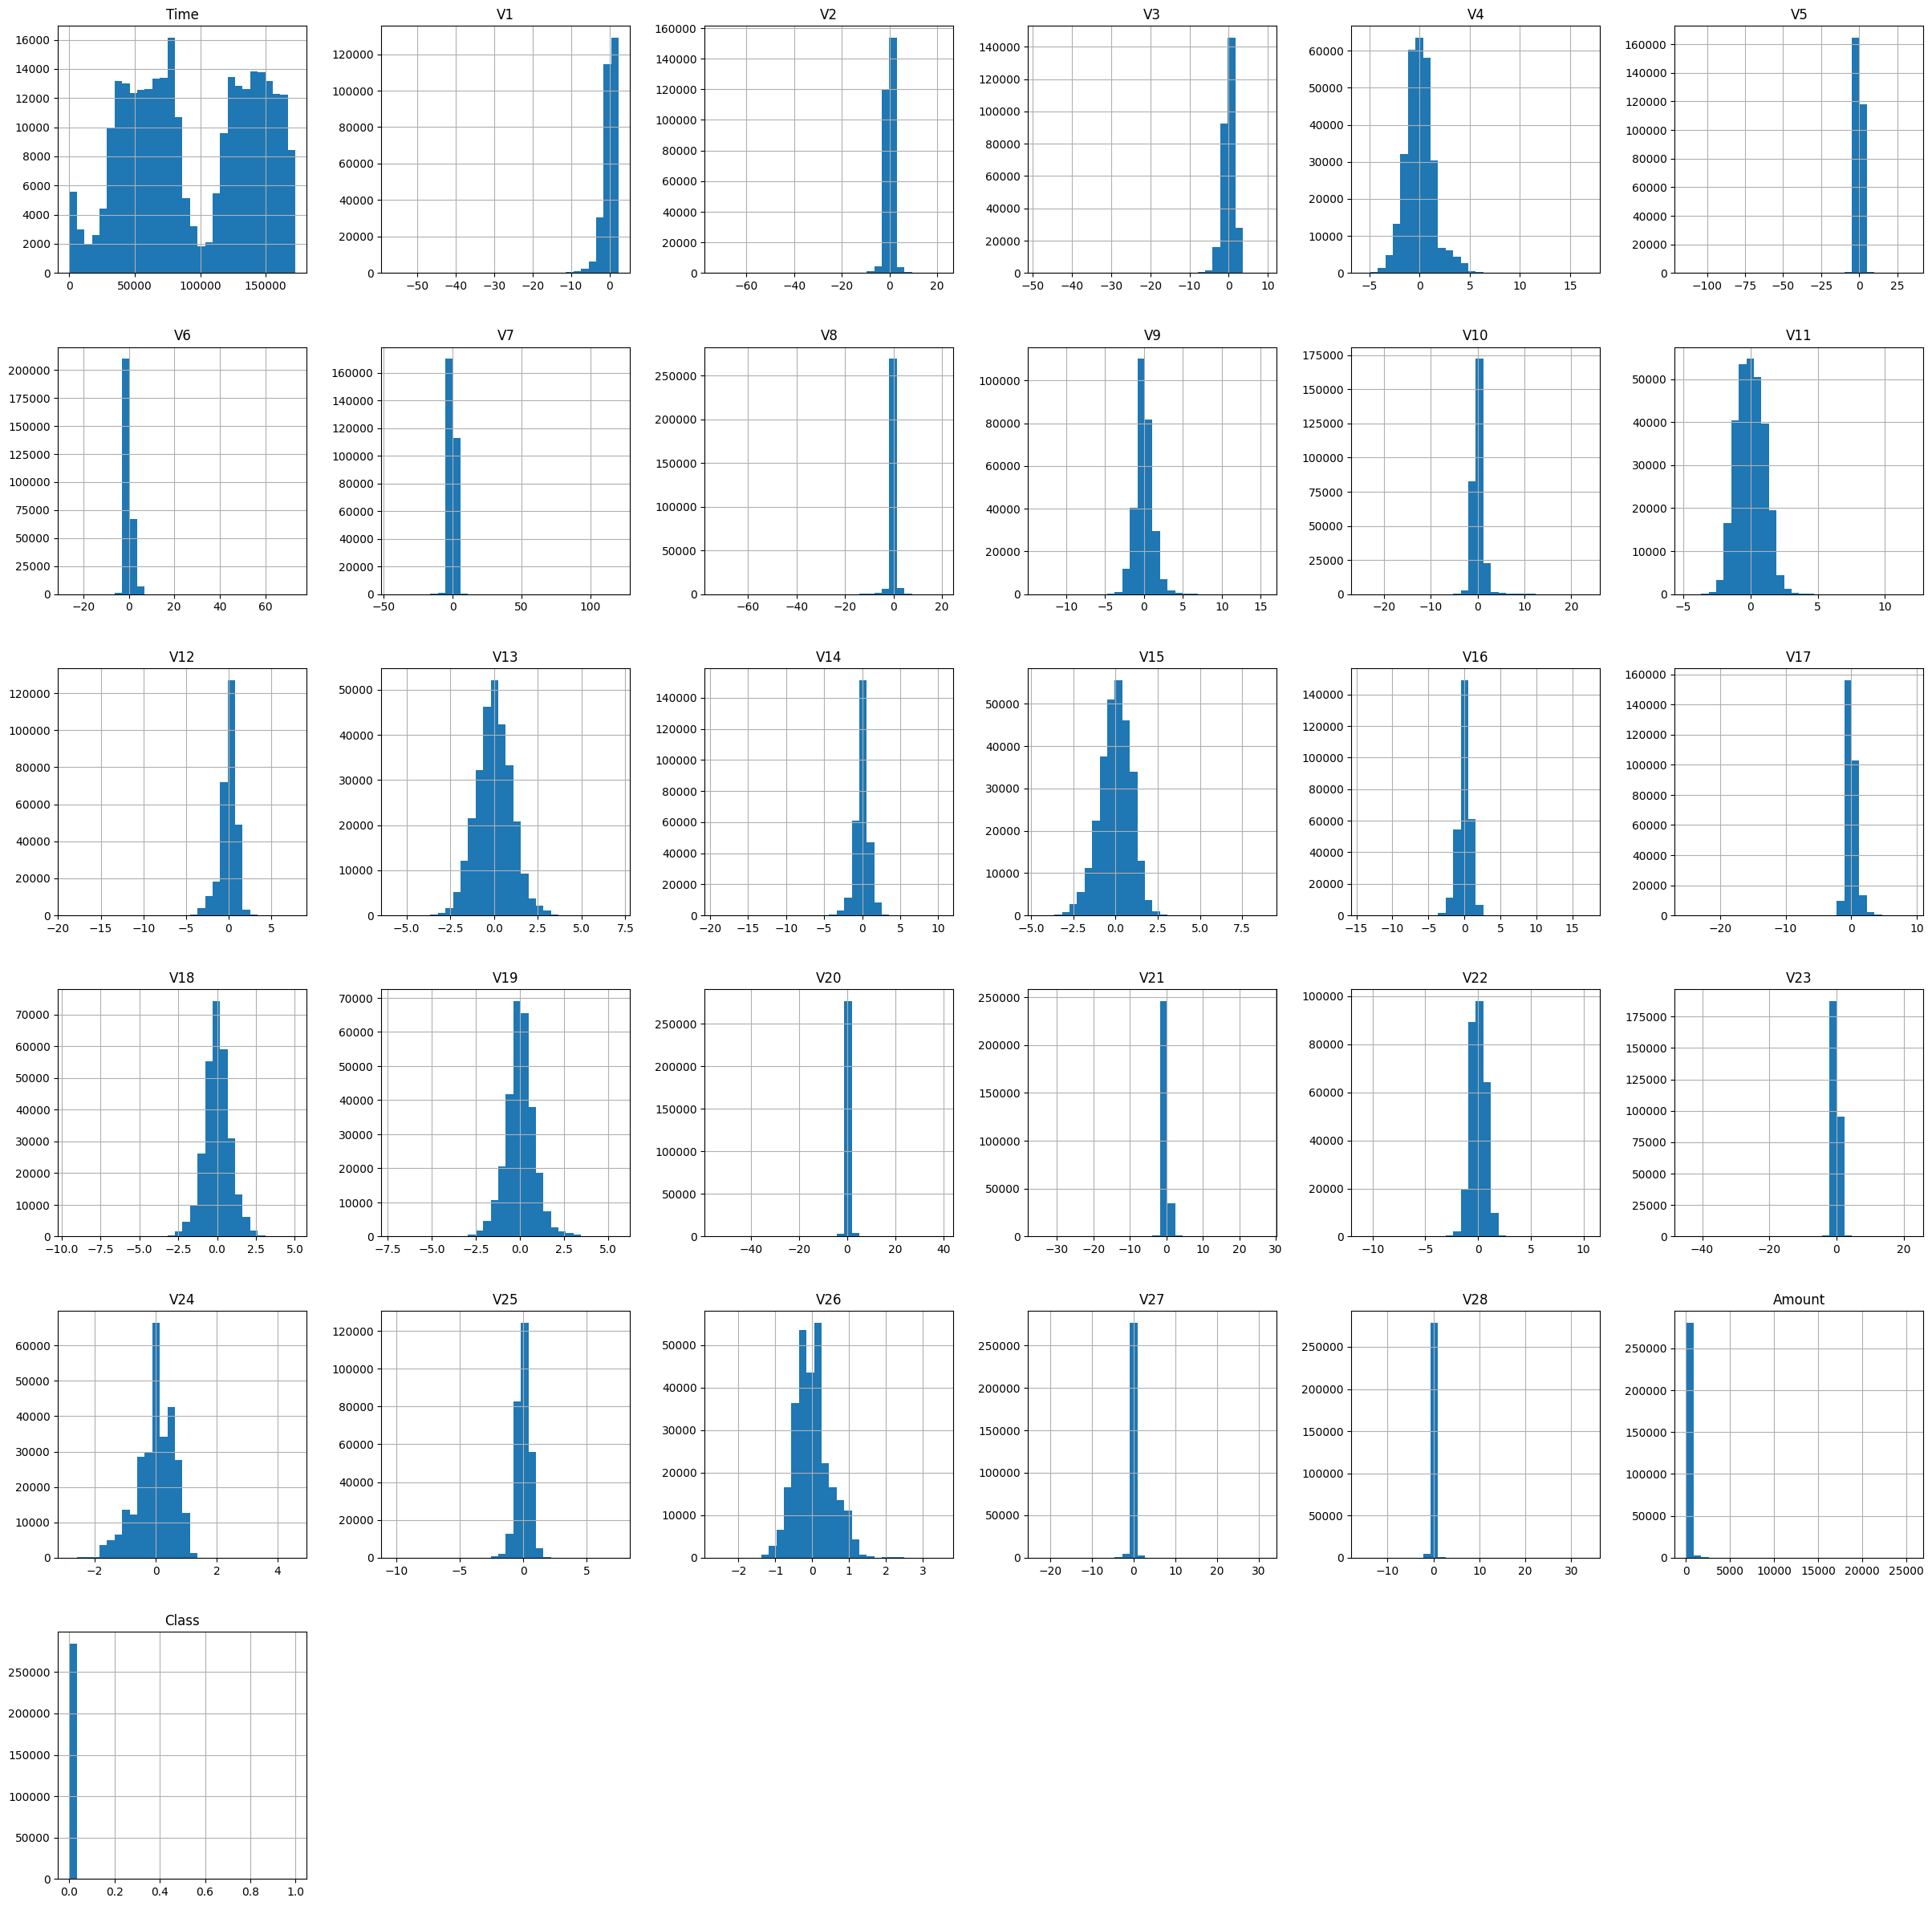

In [19]:
#histogram of all columns
df.hist(bins=30,figsize=(30,30))

In [20]:
#description of legit transaction
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [21]:
##description of fraud transaction
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [22]:
#comparing the data
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
legit_sample = legit.sample(n=492)


# 3.2.3) creating a new dataset(concatenating)

In [24]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
107243,70354.0,1.516458,-1.035938,0.414443,-1.311154,-1.653160,-1.049025,-0.988163,-0.182834,-1.667128,...,-0.227480,-0.321902,0.047492,0.337385,0.347912,-0.202655,0.021941,0.018744,15.00,0
101684,67915.0,-2.209212,-1.726563,2.139117,-0.493679,0.465436,-0.662963,-0.374119,0.434126,0.887632,...,0.052519,-0.344927,0.633853,0.080018,-0.040438,0.825861,0.156172,0.192080,190.52,0
193975,130385.0,2.055725,-0.195052,-1.483824,0.119863,0.399322,-0.123421,-0.018941,-0.002896,0.451545,...,-0.237470,-0.607133,0.267979,0.213924,-0.183375,0.258672,-0.083868,-0.073496,1.00,0
162901,115473.0,-0.631211,0.886951,0.417544,-0.607995,0.827261,-0.479313,0.917416,-0.274507,0.056982,...,-0.316292,-0.585216,-0.118519,-0.396507,-0.182346,0.243805,-0.106199,-0.049302,3.96,0
263672,161062.0,-0.989967,0.121677,0.081460,0.120449,0.903013,-0.800425,0.013702,0.436283,-0.760042,...,-0.020211,-0.430192,0.025588,-0.378473,-0.795978,0.294056,0.030136,-0.033778,2.98,0


#3.2.4) Robustscalling the data(RobustScaler is a preprocessing technique used in machine learning to scale features while being resistant to outliers)

In [26]:
# a new dataset new_df is created
from sklearn.preprocessing import RobustScaler
new_df=df.copy()
scaler= RobustScaler()
new_df['Amount']=scaler.fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
time=new_df['Time']
new_df['Time']=(time-time.min())/(time.max()-time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


<Axes: >

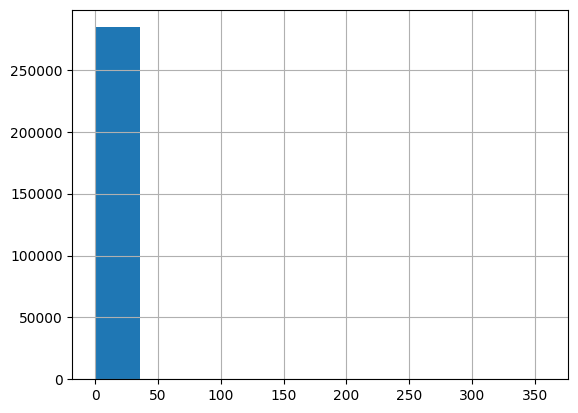

In [27]:
#final graph of the amount column
new_df['Amount'].hist()

# 3.3) **Data Visualisation**

#3.3.1) Distribution of Fraudulent vs Non-Fraudulent Transactions


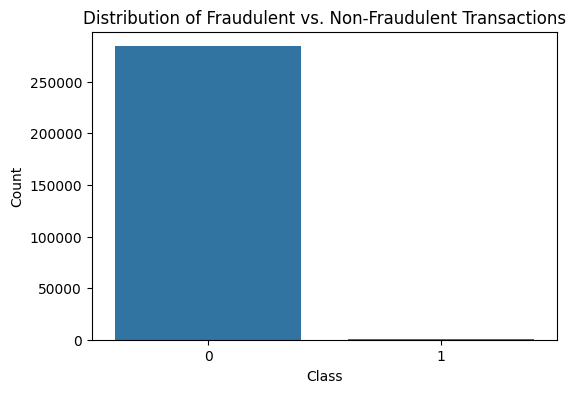

In [28]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


There is a substantial class imbalance in the dataset, with non-fraudulent transactions vastly outnumbering fraudulent ones. This imbalance is common in fraud detection datasets and poses a challenge for machine learning models, which may become biased towards predicting the majority class (non-fraudulent transactions).

# 3.3.2) Correlation Heatmap

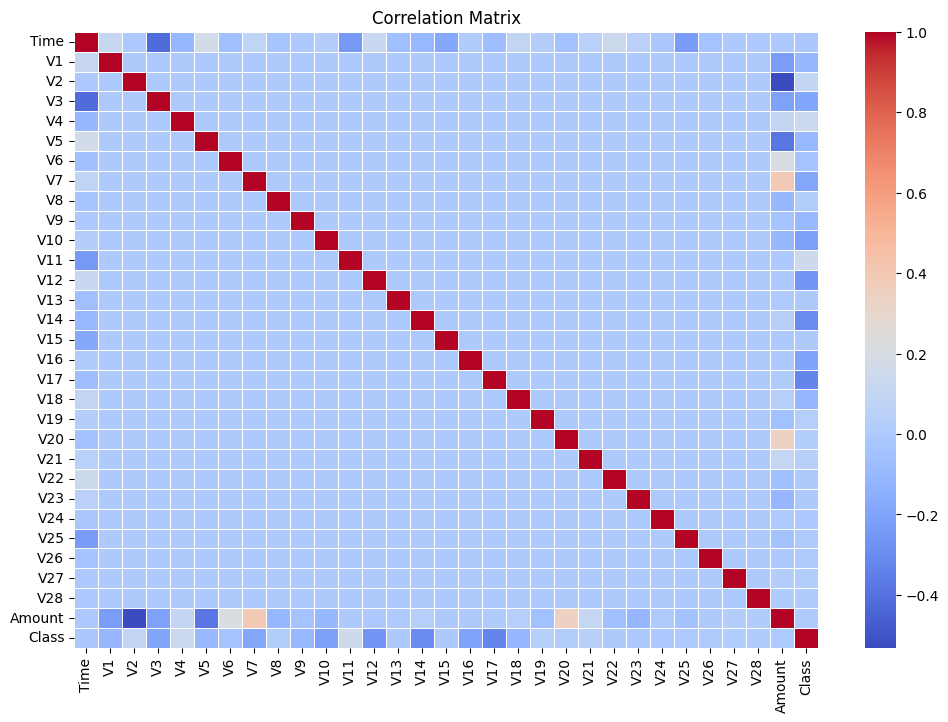

In [29]:

corr_matrix = new_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Features with higher correlations (positive or negative) with the target variable 'Class' can be considered important for building predictive models. In this case, V4, V11, V12, V14, and V17 are noteworthy


# 3.3.3) **Time vs. Amount Scatter Plot**

<ipython-input-30-22bd1d8397cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=new_df, palette='coolwarm')


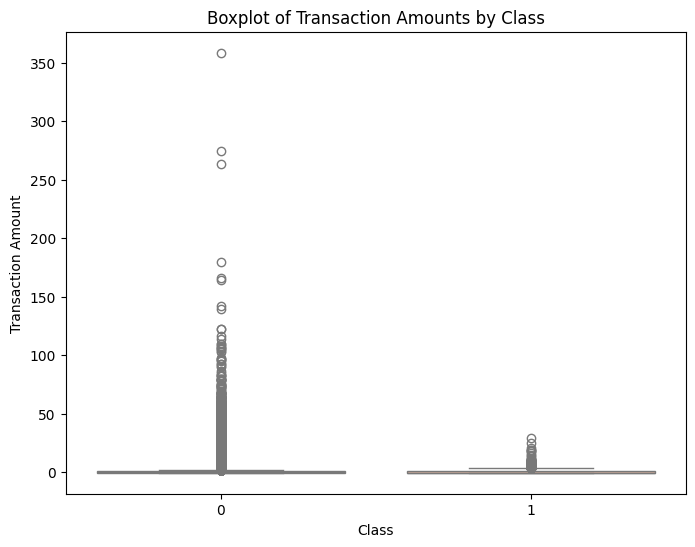

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=new_df, palette='coolwarm')
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()



Non-fraudulent transactions tend to have higher variability and more high-value transactions compared to fraudulent transactions.
Fraudulent transactions generally involve smaller amounts, which might be a strategy to avoid detection.



# **3.3.4)Pairplot for a Subset of Features**

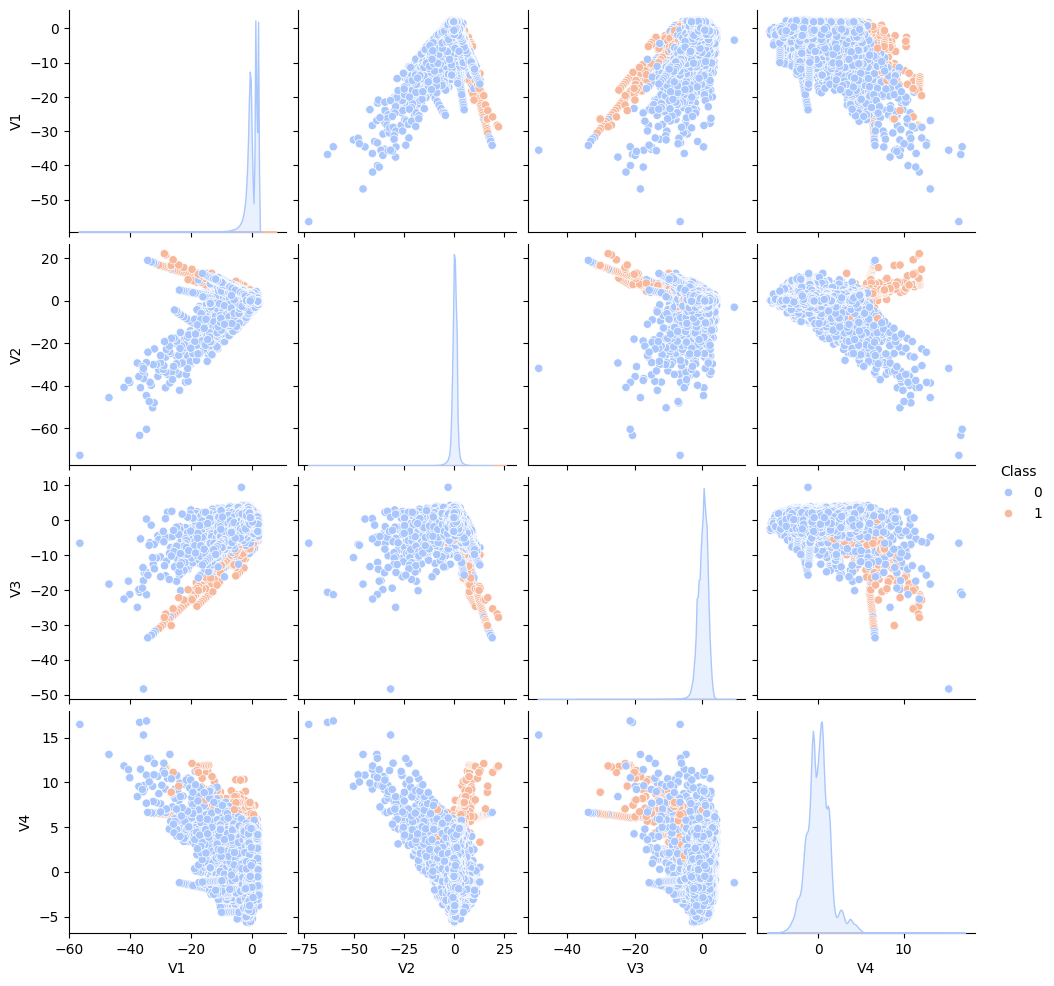

In [31]:
subset_features = ['V1', 'V2', 'V3', 'V4', 'Class']
sns.pairplot(new_df[subset_features], hue='Class', palette='coolwarm')
plt.show()


The histograms along the diagonal show the distribution of individual variables for both classes. This type of visualization is useful for identifying correlations, clusters, or patterns in multivariate data.


# 3.3.5) **Time vs. Amount Scatter Plot**

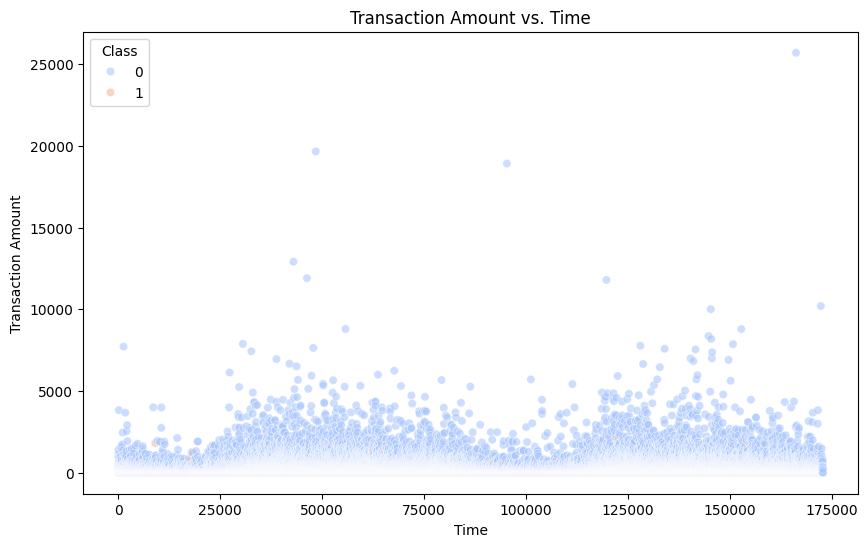

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette='coolwarm', alpha=0.6)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.show()

the graph provides a preliminary overview of transaction amounts over time


#3.3.6) **Distribution of Transaction Amounts**

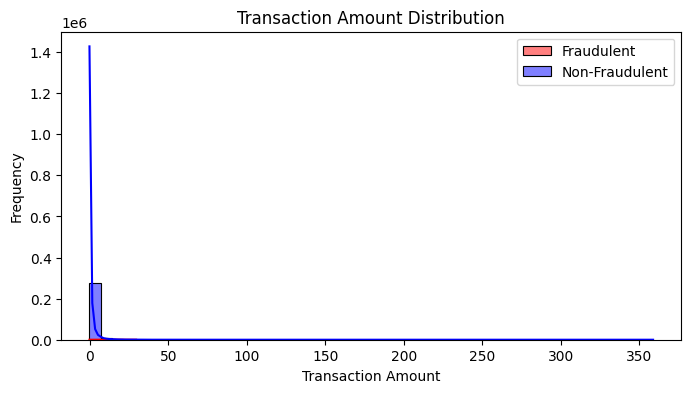

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(new_df[new_df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraudulent')
sns.histplot(new_df[new_df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


the graph provides a preliminary understanding of the distribution of transaction amounts for fraudulent and non-fraudulent cases

# **3.4) ML Training**


# 3.4.1) Shuffling the rows of new_df randomly

In [34]:
new_df= new_df.sample(frac =1 , random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


# 3.4.2)Splitting of training and testing data

In [35]:
train,test= new_df[:140000],new_df[140000:]
train['Class'].value_counts(),test['Class'].value_counts()

(Class
 0    139776
 1       224
 Name: count, dtype: int64,
 Class
 0    144539
 1       268
 Name: count, dtype: int64)

In [36]:
train_np,test_np = train.to_numpy(),test.to_numpy()
train_np.shape,test_np.shape

((140000, 31), (144807, 31))

# 3.4.3) Splitting Features and target

In [37]:
x_train, y_train=train_np[:,:-1],train_np[:,-1]
x_test,y_test= test_np[:,:-1],test_np[:,-1]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((140000, 30), (140000,), (144807, 30), (144807,))

# 3.4.4) Training the LogisticRegresssion model

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
logistic_model.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991428571428571

# 3.4.5) Analysing the accuracy of the model

In [39]:
#Test the model using predict method
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,logistic_model.predict(x_test), target_names=['Not Fraud','Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    144539
       Fraud       0.89      0.57      0.70       268

    accuracy                           1.00    144807
   macro avg       0.94      0.79      0.85    144807
weighted avg       1.00      1.00      1.00    144807



In [40]:
#For printing the confusion matrix
print(confusion_matrix(y_test,logistic_model.predict(x_test)))


[[144520     19]
 [   114    154]]


In [45]:
#Testing accuracy
print(accuracy_score(y_test,logistic_model.predict(x_test)))

0.9990815361135856


<Axes: >

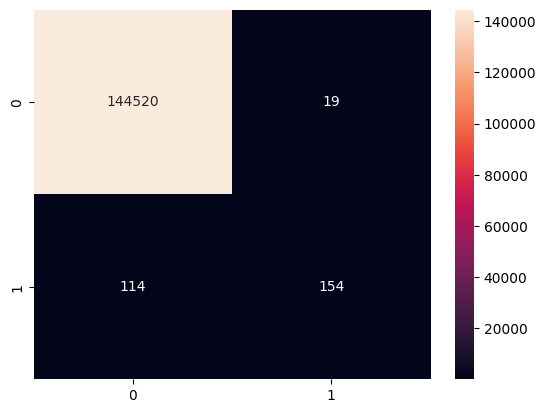

In [44]:
sns.heatmap(confusion_matrix(y_test,logistic_model.predict(x_test)),annot=True,fmt="d")

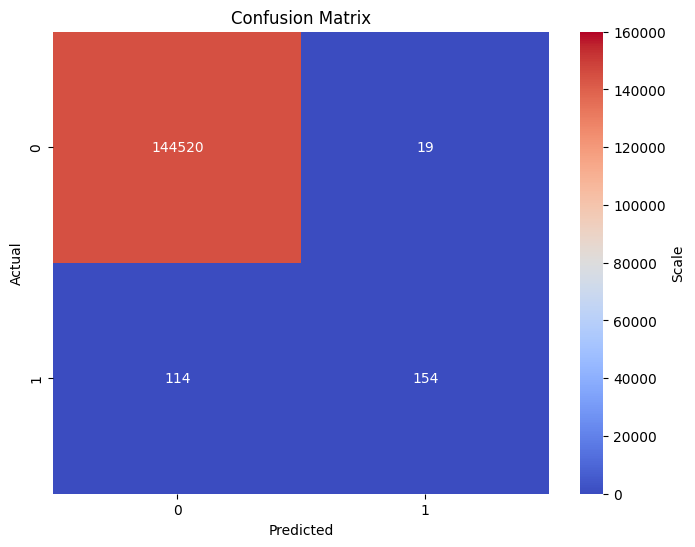

In [50]:
plt.figure(figsize=(8, 6))
confusion_matrix = confusion_matrix(y_test, logistic_model.predict(x_test))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="coolwarm", vmin=0, vmax=160000, cbar_kws={'label': 'Scale'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#Training accuracy
print(accuracy_score(y_train,logistic_model.predict(x_train)))

0.9991428571428571


# 3.4.6) Saving this model to a file

In [46]:
import joblib
joblib.dump(logistic_model, 'credit_card_fraud_model.pkl')


['credit_card_fraud_model.pkl']

# 3.4.7) Example prediction from user input

In [ ]:

model = joblib.load('credit_card_fraud_model.pkl')
predict_data = {"Time":[int(input("time:"))]}
for i in range(1,29) :
  predict_data[f"V{i}"]= [float((input(f"V{i}:")))]
predict_data["Amount"] = [float(input("amount:"))]

new_data= pd.DataFrame(predict_data)
new_data = new_data.reindex(columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount'])

# Predict3
prediction = model.predict(new_data)
print(f'Prediction: {"Fraudulent" if prediction[0] == 1 else "Legitimate"}')
